In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

In [2]:
env = gym.make('Blackjack-v1', sab=True)  # https://gymnasium.farama.org/environments/toy_text/blackjack/

V = np.zeros((10, 10, 2))
returns = np.empty((10, 10, 2), dtype=object)
for i in range(10):
    for j in range(10):
        for k in range(2):
            returns[i, j, k] = []

episodes = 200000

In [3]:
FIRST_VISIT = True

for episode in range(episodes):
    state, info = env.reset()
    done = False

    states = []
    rewards = []

    while state[0] < 12:
        state, reward, done, truncated, info = env.step(1)

    while not done:
        if state[0] < 20:
            action = 1
        else:
            action = 0

        state_index = (state[0] - 12, state[1] - 1, state[2])
        states.append(state_index)

        next_state, reward, done, truncated, info = env.step(action)
        rewards.append(reward)

        state = next_state
    
    G = 0
    for i in reversed(range(len(states))):
        G = G + rewards[i]
        if not FIRST_VISIT or states[i] not in states[:i]:
            returns[states[i]].append(G)
            V[states[i]] = np.mean(returns[states[i]])

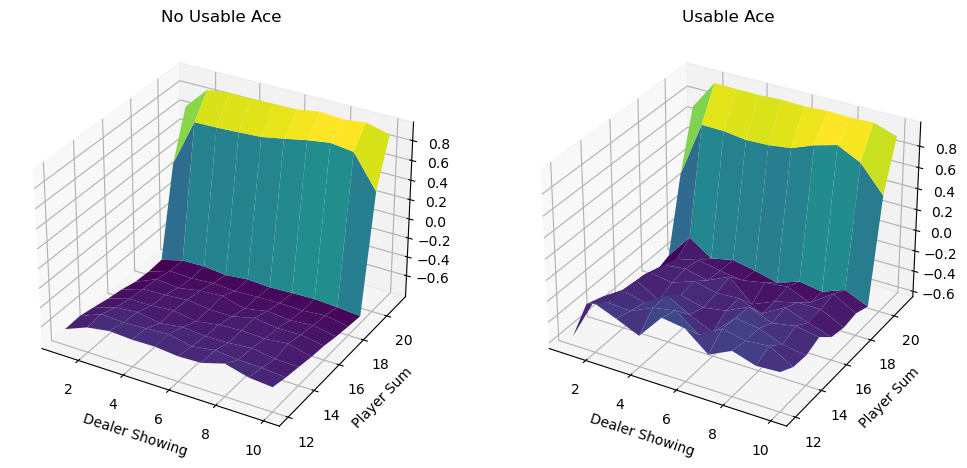

In [4]:
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
x = range(1, 11)
y = range(12, 22)
x, y = np.meshgrid(x, y)

ax[0].plot_surface(x, y, V[:, :, 0], cmap='viridis')
ax[1].plot_surface(x, y, V[:, :, 1], cmap='viridis')

ax[0].set_title('No Usable Ace')
ax[0].set_xlabel('Dealer Showing')
ax[0].set_ylabel('Player Sum')

ax[1].set_title('Usable Ace')
ax[1].set_xlabel('Dealer Showing')
ax[1].set_ylabel('Player Sum')

plt.show()